# Artificial Neural Network (ANN): Perceptron

**Aluno**: Maruan Biasi El Achkar               
**GitHub**: https://github.com/MachineNeyarning/ANN-Perceptron

------------

# 1. Problema das portas lógicas AND, OR

In [111]:
import numpy as np
np.random.seed(42)

class Perceptron: # ERROR DEVE SER PASSADO EM PORCENTAGEM, TIPO 0.1 | 1 | 50 etc.
    def __init__(self, input_size, lr=0.01, epochs=1000, d_error=0.1, weights = np.random.randn(2)):
        self.lr = lr # learning rate
        self.epochs = epochs # quantidade de "rodadas" de treino
        self.d_error = d_error / 100.0  # erro desejado por rodada para early stopping, divide por 100 para poder passar input como porcentagem
        self.weights = weights # peso, por padrao vai ser aleatorio mas da pra mudar
        self.bias = np.random.randn() # bias aleatorio
        self.n_epochs = 0 # contador de rodadas

    def activation(self, x):
        return np.where(x >= 0, 1, -1) # se x for maior ou igual a 0, retorna +1. senao retorna -1

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias # weighted sum das entradas + bias
        return self.activation(linear_output)

    def fit(self, X, y):
        for epoch in range(self.epochs): # rodadas
            epoch_error = 0.0 # acumula erro  (d - o)^2 / 2
            for xi, target in zip(X, y):
                linear_output = np.dot(xi, self.weights) + self.bias
                y_pred = self.activation(linear_output)
                # ----
                update = self.lr * (target - y_pred) # erro vezes learning rate
                self.weights += update * xi # ajuste dos pesos
                self.bias += update # ajuste do bias
                epoch_error += ((target - y_pred) ** 2) / 2.0 # erro quadratico/2

            if epoch_error < self.d_error: # early stopping
                self.n_epochs = epoch + 1 # contador de rodadas
                break
        else:
            self.n_epochs = self.epochs

# calculadora de accuracy, compara a truth table com a predicao
def accuracy(y_true, y_pred):
    correct = np.sum(y_true == y_pred)
    total = len(y_true)
    return (correct / total) * 100

# calculador de error rate
def error_rate(y_true, y_pred):
    return 100 - accuracy(y_true, y_pred)


# AND GATE
X_and = np.array([[0,0], [0,1], [1,0], [1,1]])
y_and = np.array([-1, -1, -1, 1])

# OR GATE
X_or = np.array([[0,0], [0,1], [1,0], [1,1]])
y_or = np.array([-1, 1, 1, 1])

# XOR GATE
X_xor = np.array([[0,0], [0,1], [1,0], [1,1]])
y_xor = np.array([-1, 1, 1, -1])

# treino
model = Perceptron(input_size=2, lr=0.1, epochs=1000, d_error=1e-3)

# fit AND
model.fit(X_and, y_and)
y_and_predict = model.predict(X_and)
print("-----------------------------------------")
print("- AND GATE")
print(f"- Acurracy: {accuracy(y_and, y_and_predict):.2f}%")
print(f"- Error rate: {error_rate(y_and, y_and_predict):.2f}%")
print(f"- Rodadas necessárias: {model.n_epochs}")
print("- Predictions:", y_and_predict)
print("- Weights:", model.weights)
print("- Bias:", model.bias)
print("-----------------------------------------")

# fit OR
model.fit(X_or, y_or)
y_or_predict = model.predict(X_or)
print("-----------------------------------------")
print("- OR GATE")
print(f"- Acurracy: {accuracy(y_or, y_or_predict):.2f}%")
print(f"- Error rate: {error_rate(y_or, y_or_predict):.2f}%")
print(f"- Rodadas necessárias: {model.n_epochs}")
print("- Predictions:", y_or_predict)
print("- Weights:", model.weights)
print("- Bias:", model.bias)
print("-----------------------------------------")

# fit XOR
model.fit(X_xor, y_xor)
y_xor_predict = model.predict(X_xor)
print("-----------------------------------------")
print("- XOR GATE")
print(f"- Acurracy: {accuracy(y_xor, y_xor_predict):.2f}%")
print(f"- Error rate: {error_rate(y_xor, y_xor_predict):.2f}%")
print(f"- Rodadas necessárias: {model.n_epochs}")
print("- Predictions:", y_xor_predict)
print("- Weights:", model.weights)
print("- Bias:", model.bias)
print("-----------------------------------------")

-----------------------------------------
- AND GATE
- Acurracy: 100.00%
- Error rate: 0.00%
- Rodadas necessárias: 6
- Predictions: [-1 -1 -1  1]
- Weights: [0.29671415 0.0617357 ]
- Bias: -0.35231146189930757
-----------------------------------------
-----------------------------------------
- OR GATE
- Acurracy: 100.00%
- Error rate: 0.00%
- Rodadas necessárias: 2
- Predictions: [-1  1  1  1]
- Weights: [0.29671415 0.2617357 ]
- Bias: -0.15231146189930755
-----------------------------------------
-----------------------------------------
- XOR GATE
- Acurracy: 25.00%
- Error rate: 75.00%
- Rodadas necessárias: 1000
- Predictions: [ 1  1 -1  1]
- Weights: [-0.10328585  0.0617357 ]
- Bias: 0.04768853810069246
-----------------------------------------


# 2. Repita o exercício 1 sobre o problema das portas lógicas utilizando a Regra de Aprendizado Delta

In [112]:
import numpy as np
np.random.seed(42)

class Perceptron: # ERROR DEVE SER PASSADO EM PORCENTAGEM, TIPO 0.1 | 1 | 50 etc.
    def __init__(self, input_size, lr=0.01, epochs=1000, d_error=0.1, weights = np.random.randn(2)):
        self.lr = lr # learning rate
        self.epochs = epochs # quantidade de "rodadas" de treino
        self.d_error = d_error / 100.0  # erro desejado por rodada para early stopping, divide por 100 para poder passar input como porcentagem
        self.weights = weights # peso, por padrao vai ser aleatorio mas da pra mudar
        self.bias = np.random.randn() # bias aleatorio
        self.n_epochs = 0 # contador de rodadas

    def activation(self, x):
        return np.where(x >= 0, 1, -1) # se x for maior ou igual a 0, retorna +1. senao retorna -1

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias # weighted sum das entradas + bias
        return self.activation(linear_output)

    def fit(self, X, y):
        for epoch in range(self.epochs): # rodadas
            epoch_error = 0.0 # acumula erro  (d - o)^2 / 2
            for xi, target in zip(X, y):
                linear_output = np.dot(xi, self.weights) + self.bias
                y_pred = self.activation(linear_output)
                # ----
                update = self.lr * (target - y_pred) # erro vezes learning rate
                self.weights += update * xi # ajuste dos pesos
                self.bias += update # ajuste do bias
                epoch_error += ((target - y_pred) ** 2) / 2.0 # erro quadratico/2

            if epoch_error < self.d_error: # early stopping
                self.n_epochs = epoch + 1 # contador de rodadas
                break
        else:
            self.n_epochs = self.epochs

    # TREINO COM REGRA DELTA
    def fit_delta(self, X, y):
        for epoch in range(self.epochs): # rodadas
            epoch_error = 0.0 # acumula erro (d - o)^2 / 2
            for xi, target in zip(X, y):
                linear_output = np.dot(xi, self.weights) + self.bias # weighted sum das entradas + bias
                y_pred = linear_output # saida linear (identidade)

                # ----
                error = (target - y_pred) # erro (d - o)
                update = self.lr * error # gradiente com ativacao identidade (derivada = 1)
                self.weights += update * xi # ajuste dos pesos (LMS)
                self.bias += update # ajuste do bias

                epoch_error += (error ** 2) / 2.0 # erro quadratico/2

            if epoch_error < self.d_error: # early stopping
                self.n_epochs = epoch + 1 # contador de rodadas
                break
        else:
            self.n_epochs = self.epochs



# calculadora de accuracy, compara a truth table com a predicao
def accuracy(y_true, y_pred):
    correct = np.sum(y_true == y_pred)
    total = len(y_true)
    return (correct / total) * 100

# calculador de error rate
def error_rate(y_true, y_pred):
    return 100 - accuracy(y_true, y_pred)


# AND GATE
X_and = np.array([[0,0], [0,1], [1,0], [1,1]])
y_and = np.array([-1, -1, -1, 1])

# OR GATE
X_or = np.array([[0,0], [0,1], [1,0], [1,1]])
y_or = np.array([-1, 1, 1, 1])

# XOR GATE
X_xor = np.array([[0,0], [0,1], [1,0], [1,1]])
y_xor = np.array([-1, 1, 1, -1])

# treino
model = Perceptron(input_size=2, lr=0.1, epochs=1000, d_error=1e-3)

# fit AND
model.fit_delta(X_and, y_and)
y_and_predict = model.predict(X_and)
print("-----------------------------------------")
print("- AND GATE - Regra Delta")
print(f"- Acurracy: {accuracy(y_and, y_and_predict):.2f}%")
print(f"- Error rate: {error_rate(y_and, y_and_predict):.2f}%")
print(f"- Rodadas necessárias: {model.n_epochs}")
print("- Predictions:", y_and_predict)
print("- Weights:", model.weights)
print("- Bias:", model.bias)
print("-----------------------------------------")

# fit OR
model.fit_delta(X_or, y_or)
y_or_predict = model.predict(X_or)
print("-----------------------------------------")
print("- OR GATE - Regra Delta")
print(f"- Acurracy: {accuracy(y_or, y_or_predict):.2f}%")
print(f"- Error rate: {error_rate(y_or, y_or_predict):.2f}%")
print(f"- Rodadas necessárias: {model.n_epochs}")
print("- Predictions:", y_or_predict)
print("- Weights:", model.weights)
print("- Bias:", model.bias)
print("-----------------------------------------")

# fit XOR
model.fit_delta(X_xor, y_xor)
y_xor_predict = model.predict(X_xor)
print("-----------------------------------------")
print("- XOR GATE - Regra Delta")
print(f"- Acurracy: {accuracy(y_xor, y_xor_predict):.2f}%")
print(f"- Error rate: {error_rate(y_xor, y_xor_predict):.2f}%")
print(f"- Rodadas necessárias: {model.n_epochs}")
print("- Predictions:", y_xor_predict)
print("- Weights:", model.weights)
print("- Bias:", model.bias)
print("-----------------------------------------")


-----------------------------------------
- AND GATE - Regra Delta
- Acurracy: 100.00%
- Error rate: 0.00%
- Rodadas necessárias: 1000
- Predictions: [-1 -1 -1  1]
- Weights: [1.11111111 1.05555556]
- Bias: -1.5555555555555547
-----------------------------------------
-----------------------------------------
- OR GATE - Regra Delta
- Acurracy: 100.00%
- Error rate: 0.00%
- Rodadas necessárias: 1000
- Predictions: [-1  1  1  1]
- Weights: [0.88888889 0.94444444]
- Bias: -0.44444444444444536
-----------------------------------------
-----------------------------------------
- XOR GATE - Regra Delta
- Acurracy: 25.00%
- Error rate: 75.00%
- Rodadas necessárias: 1000
- Predictions: [ 1 -1 -1 -1]
- Weights: [-0.22222222 -0.11111111]
- Bias: 0.11111111111111087
-----------------------------------------


# 3 Interagir com o código (Utilizando AND gate)

## Alterar a Taxa de Aprendizado (Learning Rate)
Mude o valor de ‘c’ para ver como isso afeta a velocidade de convergência do
algoritmo. Valores comuns são 0.1, 0.01, ou 0.001. Experimente com uma taxa de aprendizado muito alta e muito baixa e observe as
diferenças no comportamento do treinamento.

In [113]:
import numpy as np
np.random.seed(42)

class Perceptron: # ERROR DEVE SER PASSADO EM PORCENTAGEM, TIPO 0.1 | 1 | 50 etc.
    def __init__(self, input_size, lr=0.01, epochs=1000, d_error=0.1, weights = np.random.randn(2)):
        self.lr = lr # learning rate
        self.epochs = epochs # quantidade de "rodadas" de treino
        self.d_error = d_error / 100.0  # erro desejado por rodada para early stopping, divide por 100 para poder passar input como porcentagem
        self.weights = weights # peso, por padrao vai ser aleatorio mas da pra mudar
        self.bias = np.random.randn() # bias aleatorio
        self.n_epochs = 0 # contador de rodadas

    def activation(self, x):
        return np.where(x >= 0, 1, -1) # se x for maior ou igual a 0, retorna +1. senao retorna -1

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias # weighted sum das entradas + bias
        return self.activation(linear_output)

    def fit(self, X, y):
        for epoch in range(self.epochs): # rodadas
            epoch_error = 0.0 # acumula erro  (d - o)^2 / 2
            for xi, target in zip(X, y):
                linear_output = np.dot(xi, self.weights) + self.bias
                y_pred = self.activation(linear_output)
                # ----
                update = self.lr * (target - y_pred) # erro vezes learning rate
                self.weights += update * xi # ajuste dos pesos
                self.bias += update # ajuste do bias
                epoch_error += ((target - y_pred) ** 2) / 2.0 # erro quadratico/2

            if epoch_error < self.d_error: # early stopping
                self.n_epochs = epoch + 1 # contador de rodadas
                break
        else:
            self.n_epochs = self.epochs


# calculadora de accuracy, compara a truth table com a predicao
def accuracy(y_true, y_pred):
    correct = np.sum(y_true == y_pred)
    total = len(y_true)
    return (correct / total) * 100

# calculador de error rate
def error_rate(y_true, y_pred):
    return 100 - accuracy(y_true, y_pred)


# AND GATE
X_and = np.array([[0,0], [0,1], [1,0], [1,1]])
y_and = np.array([-1, -1, -1, 1])


##################

# treino
model = Perceptron(input_size=2, lr=0.1, epochs=10000, d_error=1e-3)

# fit AND
model.fit(X_and, y_and)

y_and_predict = model.predict(X_and)
print("-----------------------------------------")
print("- AND GATE - Learning Rate 0.1")
print(f"- Acurracy: {accuracy(y_and, y_and_predict):.2f}%")
print(f"- Error rate: {error_rate(y_and, y_and_predict):.2f}%")
print(f"- Rodadas necessárias: {model.n_epochs}")
print("- Predictions:", y_and_predict)
print("- Weights:", model.weights)
print("- Bias:", model.bias)
print("-----------------------------------------")

#### learning rate 0.01

# treino
model = Perceptron(input_size=2, lr=0.01, epochs=10000, d_error=1e-3)

# fit AND
model.fit(X_and, y_and)

y_and_predict = model.predict(X_and)
print("-----------------------------------------")
print("- AND GATE - Learning Rate 0.01")
print(f"- Acurracy: {accuracy(y_and, y_and_predict):.2f}%")
print(f"- Error rate: {error_rate(y_and, y_and_predict):.2f}%")
print(f"- Rodadas necessárias: {model.n_epochs}")
print("- Predictions:", y_and_predict)
print("- Weights:", model.weights)
print("- Bias:", model.bias)
print("-----------------------------------------")

#### learning rate 0.001

# treino
model = Perceptron(input_size=2, lr=0.001, epochs=10000, d_error=1e-3)

# fit AND
model.fit(X_and, y_and)

y_and_predict = model.predict(X_and)
print("-----------------------------------------")
print("- AND GATE - Learning Rate 0.001")
print(f"- Acurracy: {accuracy(y_and, y_and_predict):.2f}%")
print(f"- Error rate: {error_rate(y_and, y_and_predict):.2f}%")
print(f"- Rodadas necessárias: {model.n_epochs}")
print("- Predictions:", y_and_predict)
print("- Weights:", model.weights)
print("- Bias:", model.bias)
print("-----------------------------------------")

#### learning rate 0.0000000001

# treino
model = Perceptron(input_size=2, lr=0.0000000001, epochs=50000, d_error=1e-3)

# fit AND
model.fit(X_and, y_and)

y_and_predict = model.predict(X_and)
print("-----------------------------------------")
print("- AND GATE - Learning Rate 0.0000000001")
print(f"- Acurracy: {accuracy(y_and, y_and_predict):.2f}%")
print(f"- Error rate: {error_rate(y_and, y_and_predict):.2f}%")
print(f"- Rodadas necessárias: {model.n_epochs}")
print("- Predictions:", y_and_predict)
print("- Weights:", model.weights)
print("- Bias:", model.bias)
print("-----------------------------------------")

-----------------------------------------
- AND GATE - Learning Rate 0.1
- Acurracy: 100.00%
- Error rate: 0.00%
- Rodadas necessárias: 6
- Predictions: [-1 -1 -1  1]
- Weights: [0.29671415 0.0617357 ]
- Bias: -0.35231146189930757
-----------------------------------------
-----------------------------------------
- AND GATE - Learning Rate 0.01
- Acurracy: 100.00%
- Error rate: 0.00%
- Rodadas necessárias: 42
- Predictions: [-1 -1 -1  1]
- Weights: [0.03671415 0.0017357 ]
- Bias: -0.03697014359197573
-----------------------------------------
-----------------------------------------
- AND GATE - Learning Rate 0.001
- Acurracy: 100.00%
- Error rate: 0.00%
- Rodadas necessárias: 34
- Predictions: [-1 -1 -1  1]
- Weights: [0.10271415 0.0677357 ]
- Bias: -0.1681533747233359
-----------------------------------------
-----------------------------------------
- AND GATE - Learning Rate 0.0000000001
- Acurracy: 75.00%
- Error rate: 25.00%
- Rodadas necessárias: 50000
- Predictions: [-1 -1 -1 -

## Inicialização de Pesos
Experimente diferentes métodos de inicialização de pesos, como definir todos para zero, inicializar com
valores pequenos próximos de zero, ou usar uma distribuição diferente.


In [114]:
import numpy as np
np.random.seed(42)

class Perceptron: # ERROR DEVE SER PASSADO EM PORCENTAGEM, TIPO 0.1 | 1 | 50 etc.
    def __init__(self, input_size, lr=0.01, epochs=1000, d_error=0.1, weights = np.random.randn(2)):
        self.lr = lr # learning rate
        self.epochs = epochs # quantidade de "rodadas" de treino
        self.d_error = d_error / 100.0  # erro desejado por rodada para early stopping, divide por 100 para poder passar input como porcentagem
        self.weights = weights # peso, por padrao vai ser aleatorio mas da pra mudar
        self.bias = np.random.randn() # bias aleatorio
        self.n_epochs = 0 # contador de rodadas

    def activation(self, x):
        return np.where(x >= 0, 1, -1) # se x for maior ou igual a 0, retorna +1. senao retorna -1

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias # weighted sum das entradas + bias
        return self.activation(linear_output)

    def fit(self, X, y):
        for epoch in range(self.epochs): # rodadas
            epoch_error = 0.0 # acumula erro  (d - o)^2 / 2
            for xi, target in zip(X, y):
                linear_output = np.dot(xi, self.weights) + self.bias
                y_pred = self.activation(linear_output)
                # ----
                update = self.lr * (target - y_pred) # erro vezes learning rate
                self.weights += update * xi # ajuste dos pesos
                self.bias += update # ajuste do bias
                epoch_error += ((target - y_pred) ** 2) / 2.0 # erro quadratico/2

            if epoch_error < self.d_error: # early stopping
                self.n_epochs = epoch + 1 # contador de rodadas
                break
        else:
            self.n_epochs = self.epochs


# calculadora de accuracy, compara a truth table com a predicao
def accuracy(y_true, y_pred):
    correct = np.sum(y_true == y_pred)
    total = len(y_true)
    return (correct / total) * 100

# calculador de error rate
def error_rate(y_true, y_pred):
    return 100 - accuracy(y_true, y_pred)


# AND GATE
X_and = np.array([[0,0], [0,1], [1,0], [1,1]])
y_and = np.array([-1, -1, -1, 1])


##### PESOS ALEATORIOS

# treino
model = Perceptron(input_size=2, lr=0.1, epochs=10000, d_error=1e-3, weights=np.random.randn(2))

# fit AND
model.fit(X_and, y_and)

y_and_predict = model.predict(X_and)
print("-----------------------------------------")
print("- AND GATE - Pesos Aleatorios")
print(f"- Acurracy: {accuracy(y_and, y_and_predict):.2f}%")
print(f"- Error rate: {error_rate(y_and, y_and_predict):.2f}%")
print(f"- Rodadas necessárias: {model.n_epochs}")
print("- Predictions:", y_and_predict)
print("- Weights:", model.weights)
print("- Bias:", model.bias)
print("-----------------------------------------")

##### PESOS ZERADOS

# treino
model = Perceptron(input_size=2, lr=0.1, epochs=10000, d_error=1e-3, weights=[0, 0])

# fit AND
model.fit(X_and, y_and)

y_and_predict = model.predict(X_and)
print("-----------------------------------------")
print("- AND GATE - Pesos Zerados")
print(f"- Acurracy: {accuracy(y_and, y_and_predict):.2f}%")
print(f"- Error rate: {error_rate(y_and, y_and_predict):.2f}%")
print(f"- Rodadas necessárias: {model.n_epochs}")
print("- Predictions:", y_and_predict)
print("- Weights:", model.weights)
print("- Bias:", model.bias)
print("-----------------------------------------")


##### PESOS 1

# treino
model = Perceptron(input_size=2, lr=0.1, epochs=10000, d_error=1e-3, weights=[1, 1])

# fit AND
model.fit(X_and, y_and)

y_and_predict = model.predict(X_and)
print("-----------------------------------------")
print("- AND GATE - Pesos 1")
print(f"- Acurracy: {accuracy(y_and, y_and_predict):.2f}%")
print(f"- Error rate: {error_rate(y_and, y_and_predict):.2f}%")
print(f"- Rodadas necessárias: {model.n_epochs}")
print("- Predictions:", y_and_predict)
print("- Weights:", model.weights)
print("- Bias:", model.bias)
print("-----------------------------------------")

##### PESOS 2

# treino
model = Perceptron(input_size=2, lr=0.1, epochs=10000, d_error=1e-3, weights=[2, 2])

# fit AND
model.fit(X_and, y_and)

y_and_predict = model.predict(X_and)
print("-----------------------------------------")
print("- AND GATE - Pesos 2")
print(f"- Acurracy: {accuracy(y_and, y_and_predict):.2f}%")
print(f"- Error rate: {error_rate(y_and, y_and_predict):.2f}%")
print(f"- Rodadas necessárias: {model.n_epochs}")
print("- Predictions:", y_and_predict)
print("- Weights:", model.weights)
print("- Bias:", model.bias)
print("-----------------------------------------")

##### PESOS 10

# treino
model = Perceptron(input_size=2, lr=0.1, epochs=10000, d_error=1e-3, weights=[10, 10])

# fit AND
model.fit(X_and, y_and)

y_and_predict = model.predict(X_and)
print("-----------------------------------------")
print("- AND GATE - Pesos 10")
print(f"- Acurracy: {accuracy(y_and, y_and_predict):.2f}%")
print(f"- Error rate: {error_rate(y_and, y_and_predict):.2f}%")
print(f"- Rodadas necessárias: {model.n_epochs}")
print("- Predictions:", y_and_predict)
print("- Weights:", model.weights)
print("- Bias:", model.bias)
print("-----------------------------------------")

##### PESOS 500

# treino
model = Perceptron(input_size=2, lr=0.1, epochs=10000, d_error=1e-3, weights=[500, 500])

# fit AND
model.fit(X_and, y_and)

y_and_predict = model.predict(X_and)
print("-----------------------------------------")
print("- AND GATE - Pesos 500")
print(f"- Acurracy: {accuracy(y_and, y_and_predict):.2f}%")
print(f"- Error rate: {error_rate(y_and, y_and_predict):.2f}%")
print(f"- Rodadas necessárias: {model.n_epochs}")
print("- Predictions:", y_and_predict)
print("- Weights:", model.weights)
print("- Bias:", model.bias)
print("-----------------------------------------")

-----------------------------------------
- AND GATE - Pesos Aleatorios
- Acurracy: 100.00%
- Error rate: 0.00%
- Rodadas necessárias: 4
- Predictions: [-1 -1 -1  1]
- Weights: [0.44768854 0.92302986]
- Bias: -1.034153374723336
-----------------------------------------
-----------------------------------------
- AND GATE - Pesos Zerados
- Acurracy: 100.00%
- Error rate: 0.00%
- Rodadas necessárias: 6
- Predictions: [-1 -1 -1  1]
- Weights: [0.4 0.2]
- Bias: -0.43413695694918053
-----------------------------------------
-----------------------------------------
- AND GATE - Pesos 1
- Acurracy: 100.00%
- Error rate: 0.00%
- Rodadas necessárias: 5
- Predictions: [-1 -1 -1  1]
- Weights: [0.4 0.2]
- Bias: -0.4207871844926084
-----------------------------------------
-----------------------------------------
- AND GATE - Pesos 2
- Acurracy: 100.00%
- Error rate: 0.00%
- Rodadas necessárias: 5
- Predictions: [-1 -1 -1  1]
- Weights: [1.2 1.2]
- Bias: -1.2325652708470913
---------------------

# Graficos

-----------------------------------------
- AND GATE
- Acurracy: 100.00%
- Error rate: 0.00%
- Rodadas necessárias: 6
- Predictions: [-1 -1 -1  1]
- Weights: [0.29671415 0.0617357 ]
- Bias: -0.35231146189930757
-----------------------------------------
-----------------------------------------
- OR GATE
- Acurracy: 100.00%
- Error rate: 0.00%
- Rodadas necessárias: 2
- Predictions: [-1  1  1  1]
- Weights: [0.29671415 0.2617357 ]
- Bias: -0.15231146189930755
-----------------------------------------
-----------------------------------------
- XOR GATE
- Acurracy: 25.00%
- Error rate: 75.00%
- Rodadas necessárias: 1000
- Predictions: [ 1  1 -1  1]
- Weights: [-0.10328585  0.0617357 ]
- Bias: 0.04768853810069246
-----------------------------------------


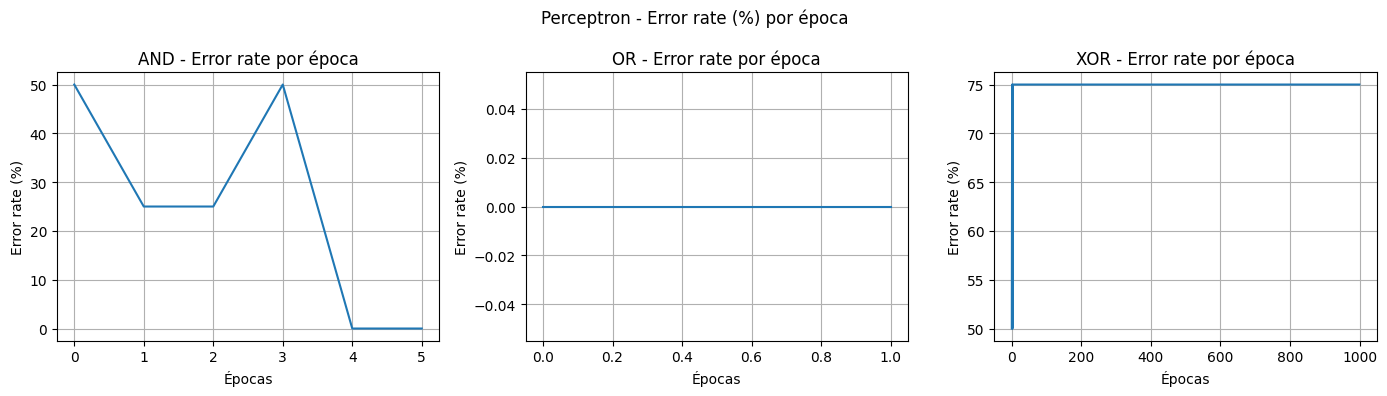

In [115]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)

class Perceptron: # ERROR DEVE SER PASSADO EM PORCENTAGEM, TIPO 0.1 | 1 | 50 etc.
    def __init__(self, input_size, lr=0.01, epochs=1000, d_error=0.1, weights = np.random.randn(2)):
        self.lr = lr # learning rate
        self.epochs = epochs # quantidade de "rodadas" de treino
        self.d_error = d_error / 100.0  # erro desejado por rodada para early stopping, divide por 100 para poder passar input como porcentagem
        self.weights = weights # peso, por padrao vai ser aleatorio mas da pra mudar
        self.bias = np.random.randn() # bias aleatorio
        self.n_epochs = 0 # contador de rodadas
        self.errors = [] # lista para salvar erro quadrático por epoch (mantido)
        self.error_rates = [] # lista para salvar error rate (%) por epoch (para os gráficos)

    def activation(self, x):
        return np.where(x >= 0, 1, -1) # se x for maior ou igual a 0, retorna +1. senao retorna -1

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias # weighted sum das entradas + bias
        return self.activation(linear_output)

    def fit(self, X, y):
        self.errors = []       # reinicia a lista de erros quadráticos por treino
        self.error_rates = []  # reinicia a lista de error rate (%) por treino
        for epoch in range(self.epochs): # rodadas
            epoch_error = 0.0 # acumula erro  (d - o)^2 / 2
            for xi, target in zip(X, y):
                linear_output = np.dot(xi, self.weights) + self.bias
                y_pred = self.activation(linear_output)
                # ----
                update = self.lr * (target - y_pred) # erro vezes learning rate
                self.weights += update * xi # ajuste dos pesos
                self.bias += update # ajuste do bias
                epoch_error += ((target - y_pred) ** 2) / 2.0 # erro quadratico/2

            self.errors.append(epoch_error) # salva erro da epoch (quadrático)
            # --- cálculo da error rate (%) ao fim da epoch, usando o estado atual do modelo
            y_epoch_pred = self.predict(X)
            # função de error rate definida abaixo (100 - accuracy)
            self.error_rates.append(100.0 - (np.sum(y == y_epoch_pred) / len(y)) * 100.0)

            if epoch_error < self.d_error: # early stopping
                self.n_epochs = epoch + 1 # contador de rodadas
                break
        else:
            self.n_epochs = self.epochs

# calculadora de accuracy, compara a truth table com a predicao
def accuracy(y_true, y_pred):
    correct = np.sum(y_true == y_pred)
    total = len(y_true)
    return (correct / total) * 100

# calculador de error rate
def error_rate(y_true, y_pred):
    return 100 - accuracy(y_true, y_pred)


# AND GATE
X_and = np.array([[0,0], [0,1], [1,0], [1,1]])
y_and = np.array([-1, -1, -1, 1])

# OR GATE
X_or = np.array([[0,0], [0,1], [1,0], [1,1]])
y_or = np.array([-1, 1, 1, 1])

# XOR GATE
X_xor = np.array([[0,0], [0,1], [1,0], [1,1]])
y_xor = np.array([-1, 1, 1, -1])

# treino
model = Perceptron(input_size=2, lr=0.1, epochs=1000, d_error=1e-3)

# fit AND
model.fit(X_and, y_and)
y_and_predict = model.predict(X_and)
print("-----------------------------------------")
print("- AND GATE")
print(f"- Acurracy: {accuracy(y_and, y_and_predict):.2f}%")
print(f"- Error rate: {error_rate(y_and, y_and_predict):.2f}%")
print(f"- Rodadas necessárias: {model.n_epochs}")
print("- Predictions:", y_and_predict)
print("- Weights:", model.weights)
print("- Bias:", model.bias)
print("-----------------------------------------")
errors_and = model.errors
error_rates_and = model.error_rates

# fit OR
model.fit(X_or, y_or)
y_or_predict = model.predict(X_or)
print("-----------------------------------------")
print("- OR GATE")
print(f"- Acurracy: {accuracy(y_or, y_or_predict):.2f}%")
print(f"- Error rate: {error_rate(y_or, y_or_predict):.2f}%")
print(f"- Rodadas necessárias: {model.n_epochs}")
print("- Predictions:", y_or_predict)
print("- Weights:", model.weights)
print("- Bias:", model.bias)
print("-----------------------------------------")
errors_or = model.errors
error_rates_or = model.error_rates

# fit XOR
model.fit(X_xor, y_xor)
y_xor_predict = model.predict(X_xor)
print("-----------------------------------------")
print("- XOR GATE")
print(f"- Acurracy: {accuracy(y_xor, y_xor_predict):.2f}%")
print(f"- Error rate: {error_rate(y_xor, y_xor_predict):.2f}%")
print(f"- Rodadas necessárias: {model.n_epochs}")
print("- Predictions:", y_xor_predict)
print("- Weights:", model.weights)
print("- Bias:", model.bias)
print("-----------------------------------------")
errors_xor = model.errors
error_rates_xor = model.error_rates


fig, axes = plt.subplots(1, 3, figsize=(14, 4))

axes[0].plot(error_rates_and)
axes[0].set_title("AND - Error rate por época")
axes[0].set_xlabel("Épocas")
axes[0].set_ylabel("Error rate (%)")
axes[0].grid(True)

axes[1].plot(error_rates_or)
axes[1].set_title("OR - Error rate por época")
axes[1].set_xlabel("Épocas")
axes[1].set_ylabel("Error rate (%)")
axes[1].grid(True)

axes[2].plot(error_rates_xor)
axes[2].set_title("XOR - Error rate por época")
axes[2].set_xlabel("Épocas")
axes[2].set_ylabel("Error rate (%)")
axes[2].grid(True)

fig.suptitle("Perceptron - Error rate (%) por época")
fig.tight_layout()
plt.show()


# Teste com Dataset mais Complexo | Sonar (Rocks vs Mines)

### Fonte do Dataset:
https://archive.ics.uci.edu/dataset/151/connectionist+bench+sonar+mines+vs+rocks

### Descricao do Dataset:
The task is to train a network to discriminate between sonar signals bounced off a metal cylinder and those bounced off a roughly cylindrical rock.

In [116]:
!pip install ucimlrepo

-----------------------------------------
- SONAR (Rocks vs Mines)
- Acurracy: 100.00%
- Error rate: 0.00%
- Rodadas necessárias: 90
- Weights: [ 0.84931768  1.05927689 -1.01695647  0.78663604 -1.21550029  1.13148865
 -0.83715956 -0.74637681  0.91204331  0.08816924  0.7172992   0.24525817
  0.2511031   0.06745149 -0.60553849 -0.08743318 -0.45382036 -0.13147145
  0.92219162 -0.10968622  0.28274488  0.13031307  0.65074805  0.32566374
 -0.10916258 -0.17772341  0.08527918  0.08491286 -0.37162988  1.43737771
 -1.83670728  0.34520646  0.88179666 -1.25201582  0.99042494 -1.26949949
 -0.73357523  0.50699038  1.01444741 -1.12301829  0.42787618 -0.25302611
  0.0576303   0.36960614 -0.23027151  0.05504836  1.5666401   0.19650616
  1.21958874 -1.54864162  0.85225256 -0.16418536  0.65961448 -0.14434826
 -0.69374519 -0.06899419 -0.10676604  0.3913455  -0.08410389 -0.60199296]
- Bias: 0.27366502599397247
-----------------------------------------
--- Teste ---
- Acurracy: 76.19%
- Error rate: 23.81%


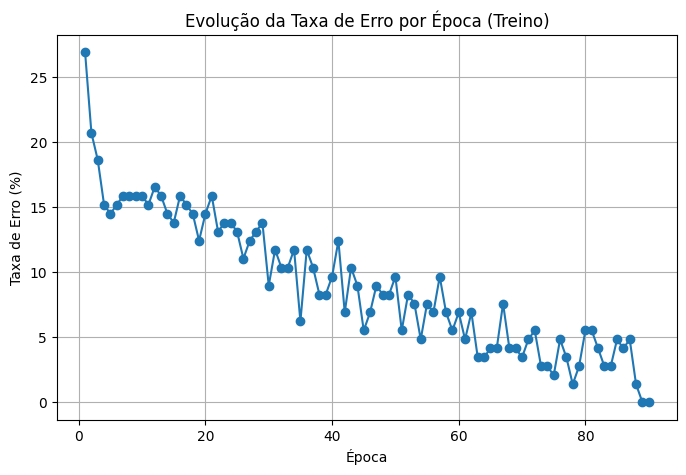

In [117]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from ucimlrepo import fetch_ucirepo
np.random.seed(42)


class Perceptron: # ERROR DEVE SER PASSADO EM PORCENTAGEM, TIPO 0.1 | 1 | 50 etc.
    def __init__(self, input_size, lr=0.01, epochs=1000, d_error=0.1, weights = np.random.randn(2)):
        self.lr = lr # learning rate
        self.epochs = epochs # quantidade de "rodadas" de treino
        self.d_error = d_error / 100.0  # erro desejado por rodada para early stopping, divide por 100 para poder passar input como porcentagem
        self.weights = weights # peso, por padrao vai ser aleatorio mas da pra mudar
        self.bias = np.random.randn() # bias aleatorio
        self.n_epochs = 0 # contador de rodadas
        self.errors = []  # guardar taxa de erro

    def activation(self, x):
        return np.where(x >= 0, 1, -1) # se x for maior ou igual a 0, retorna +1. senao retorna -1

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias # weighted sum das entradas + bias
        return self.activation(linear_output)

    def fit(self, X, y):
        for epoch in range(self.epochs): # rodadas
            epoch_error = 0.0 # acumula erro  (d - o)^2 / 2
            for xi, target in zip(X, y):
                linear_output = np.dot(xi, self.weights) + self.bias
                y_pred = self.activation(linear_output)
                # ----
                update = self.lr * (target - y_pred) # erro vezes learning rate
                self.weights += update * xi # ajuste dos pesos
                self.bias += update # ajuste do bias
                epoch_error += ((target - y_pred) ** 2) / 2.0 # erro quadratico/2

            # guarda taxa de erro em porcentagem
            y_pred_epoch = self.predict(X)
            error_rate_epoch = 100 - (np.sum(y_pred_epoch == y) / len(y)) * 100
            self.errors.append(error_rate_epoch)

            if epoch_error < self.d_error: # early stopping
                self.n_epochs = epoch + 1 # contador de rodadas
                break
        else:
            self.n_epochs = self.epochs

# calculadora de accuracy, compara a truth table com a predicao
def accuracy(y_true, y_pred):
    correct = np.sum(y_true == y_pred)
    total = len(y_true)
    return (correct / total) * 100

# calculador de error rate
def error_rate(y_true, y_pred):
    return 100 - accuracy(y_true, y_pred)


# --------------------------------------------------------------------------------- #

# baixar  dataset SONAR da UCI

connectionist_bench_sonar_mines_vs_rocks = fetch_ucirepo(id=151)

X = connectionist_bench_sonar_mines_vs_rocks.data.features.to_numpy(dtype=float)

y_raw = connectionist_bench_sonar_mines_vs_rocks.data.targets.values.ravel()
y = np.where(y_raw == 'M', 1, -1)  # M = +1, R = -1

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)

mu = X_train.mean(axis=0)
sigma = X_train.std(axis=0) + 1e-9
X_train_std = (X_train - mu) / sigma
X_test_std  = (X_test  - mu) / sigma


model = Perceptron(
    input_size=60,
    lr=0.01,
    epochs=10000,
    d_error=0.1,
    weights=np.random.randn(60)
)


model.fit(X_train_std, y_train)


y_pred_train = model.predict(X_train_std)
y_pred_test  = model.predict(X_test_std)

print("-----------------------------------------")
print("- SONAR (Rocks vs Mines)")
print(f"- Acurracy: {accuracy(y_and, y_and_predict):.2f}%")
print(f"- Error rate: {error_rate(y_and, y_and_predict):.2f}%")
print(f"- Rodadas necessárias: {model.n_epochs}")
print("- Weights:", model.weights)
print("- Bias:", model.bias)
print("-----------------------------------------")

print("--- Teste ---")
print(f"- Acurracy: {accuracy(y_test, y_pred_test):.2f}%")
print(f"- Error rate: {error_rate(y_test, y_pred_test):.2f}%")


# gfrafico
plt.figure(figsize=(8,5))
plt.plot(range(1, len(model.errors)+1), model.errors, marker="o")
plt.xlabel("Época")
plt.ylabel("Taxa de Erro (%)")
plt.title("Evolução da Taxa de Erro por Época (Treino)")
plt.grid(True)
plt.show()